# Fitting curves with the linear model

本节需要的包：


In [1]:
require(s20x)


载入需要的程辑包：s20x



## Identifying a curved relationship 初步探究曲线关系


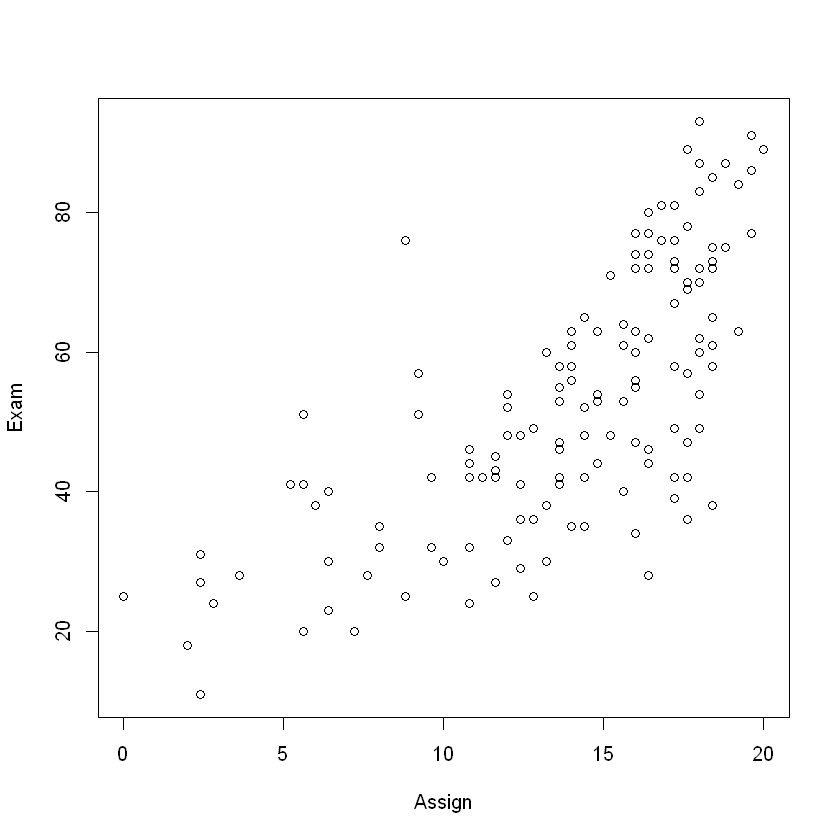

In [2]:
## Load the s20x library into our R session
library(s20x)
## Importing data into R
Stats20x.df <- read.table("../data/STATS20x.txt", header = T)
## Examine the data
plot(Exam ~ Assign, data = Stats20x.df)


Hmmm, not quite a straight line – could be some curvature. Maybe will paint a clearer picture. 不是一条很直的线--可能是一些曲率。也许会描绘出一幅更清晰的图景。


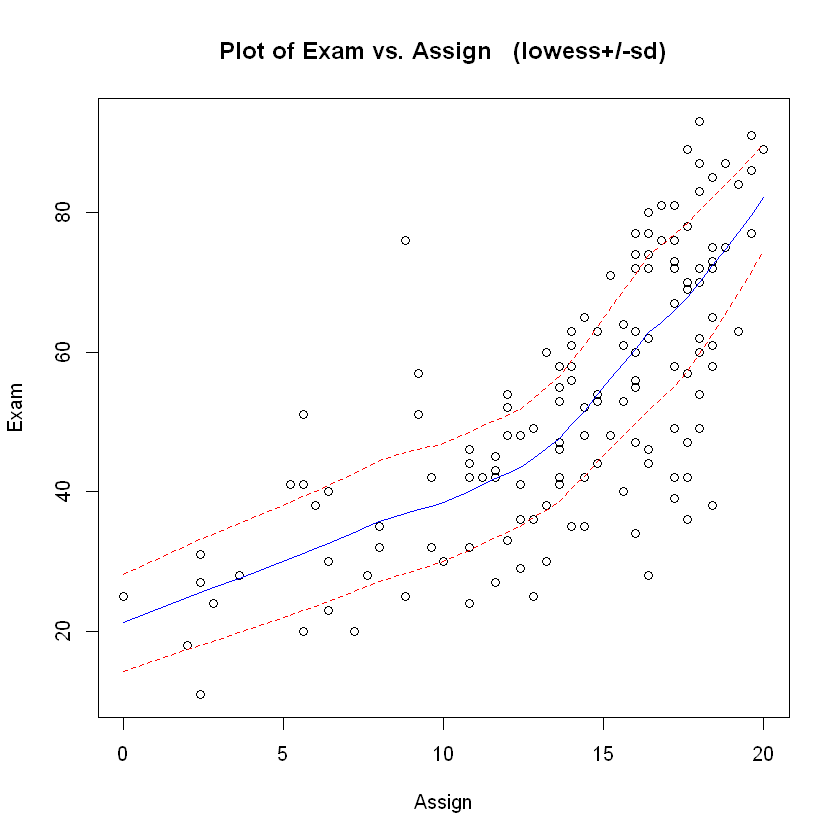

In [3]:
trendscatter(Exam ~ Assign, data = Stats20x.df)


Let’s fit a simple linear model to these data and see if it works out or not.


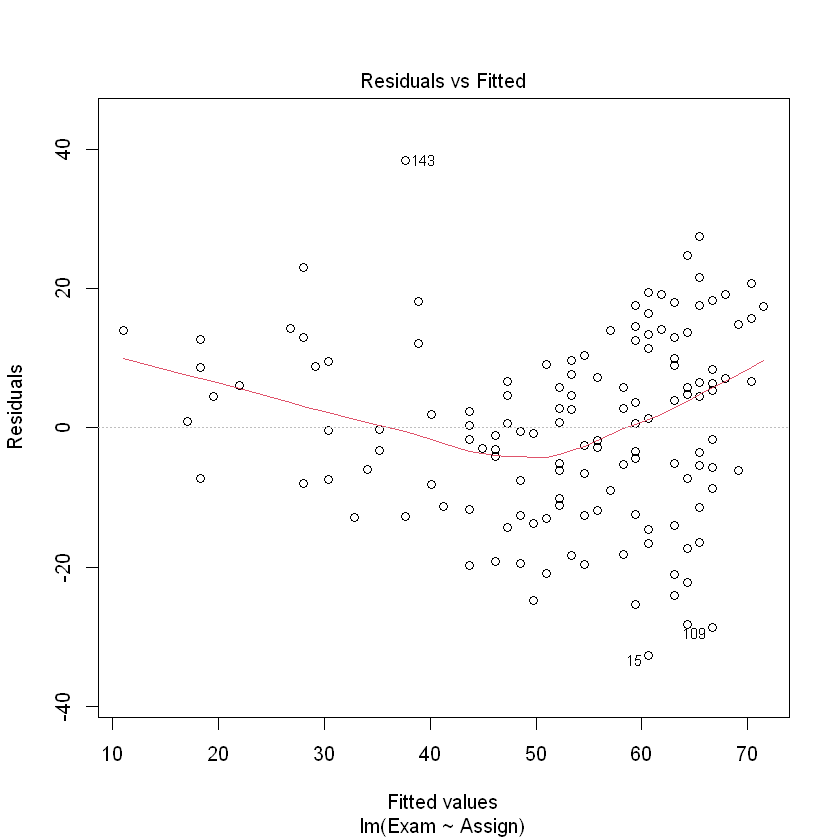

In [4]:
examassign.fit <- lm(Exam ~ Assign, data = Stats20x.df)
plot(examassign.fit, which = 1)


The assumption of identical distribution with expected value of 0 looks to be questionable here. There tend to be more negative residuals in the middle, but more positive residuals at the extremes of the fitted values. Potential solution – add a quadratic (squared term) for.

假设相同的分布与预期值 0 看起来可疑的。会有更多负面的残差在中间,但更积极的残差的极端值。潜在的解决方案应该是：添加一个二次项(平方项)。


## Fitting a quadratic model 拟合二次模型

The standard notation for a quadratic curve is:

$$
y = a x^2 + b x + c
$$

Here we will use different notation: $\beta_0 = c$, $\beta_1 = b$ and $\beta_2 = a$ and use the quadratic curve to describe the expected value of our dependent variable $y$. That is, we will use the following notation:

$$
E[Y|x] = \beta_0 + \beta_1 x + \beta_2 x^2
$$

> If $\beta_2 > 0$, then the quadratic has slope that increases with increasing x(斜率随着 x 增大而增大). If $\beta_2 < 0$, then the quadratic has slope that decreases with increasing x. If $\beta_2 = 0$, then the quadratic(该“二次曲线”) has a constant slope(倾斜直线的外观).

让我们回到之前的学生数据集。我们将使用一个新的变量 $x^2$ 来拟合一个二次模型：


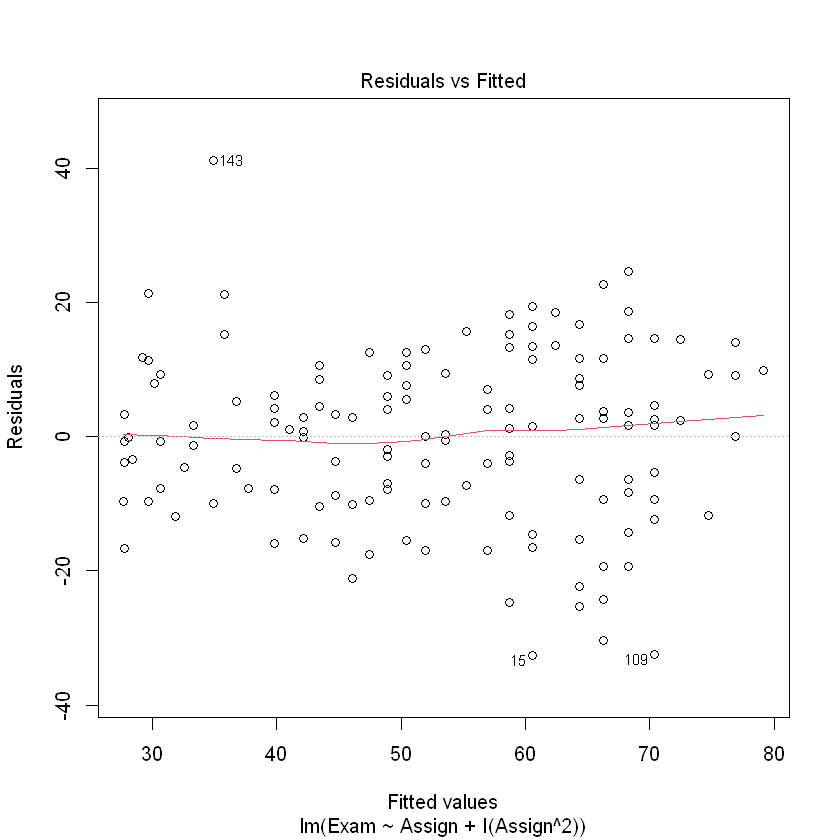

In [5]:
examassign.fit2 <- lm(Exam ~ Assign + I(Assign^2), data = Stats20x.df)
plot(examassign.fit2, which = 1)


That is looking much better.

接下来我们会进行“三步走”中的后两步：


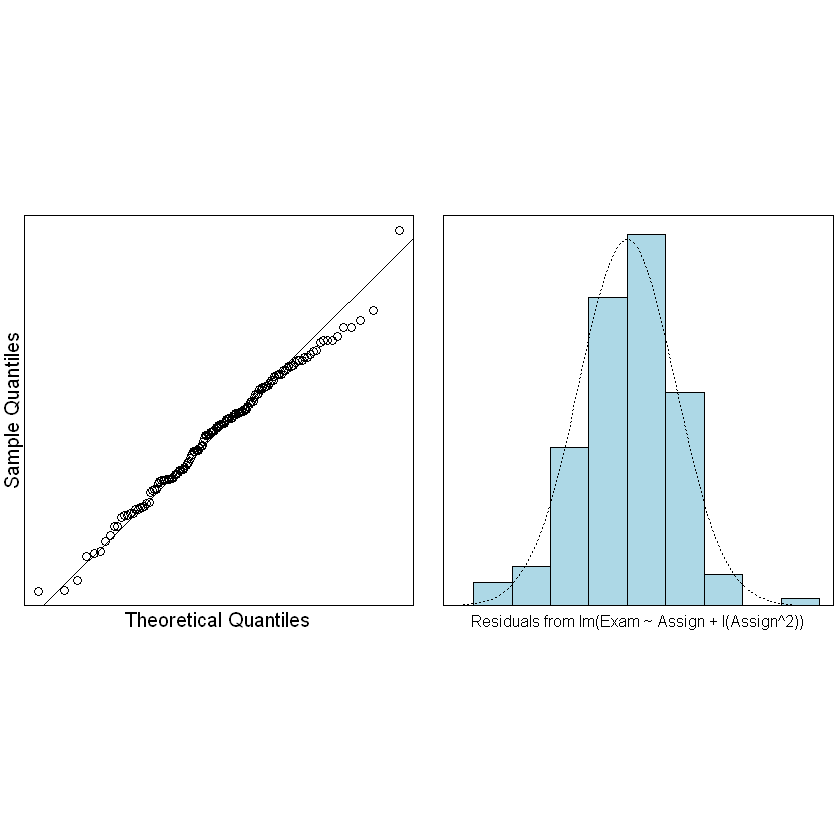

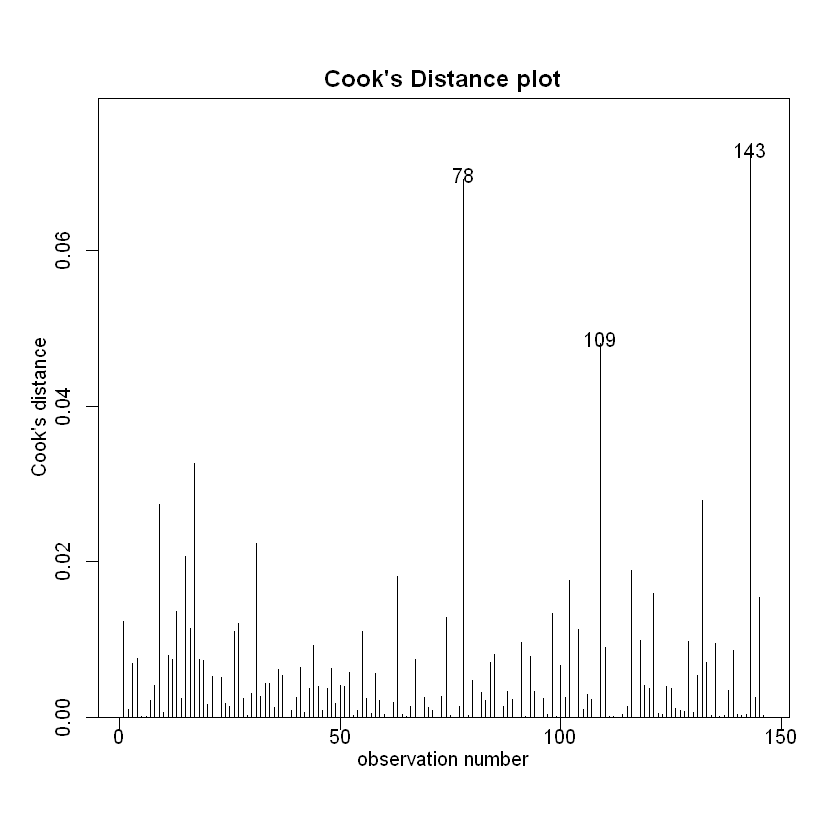

In [6]:
normcheck(examassign.fit2)
cooks20x(examassign.fit2)


符合正态分布、方差齐性。我们可以尝试对照一下原来的模型和我们的新模型：


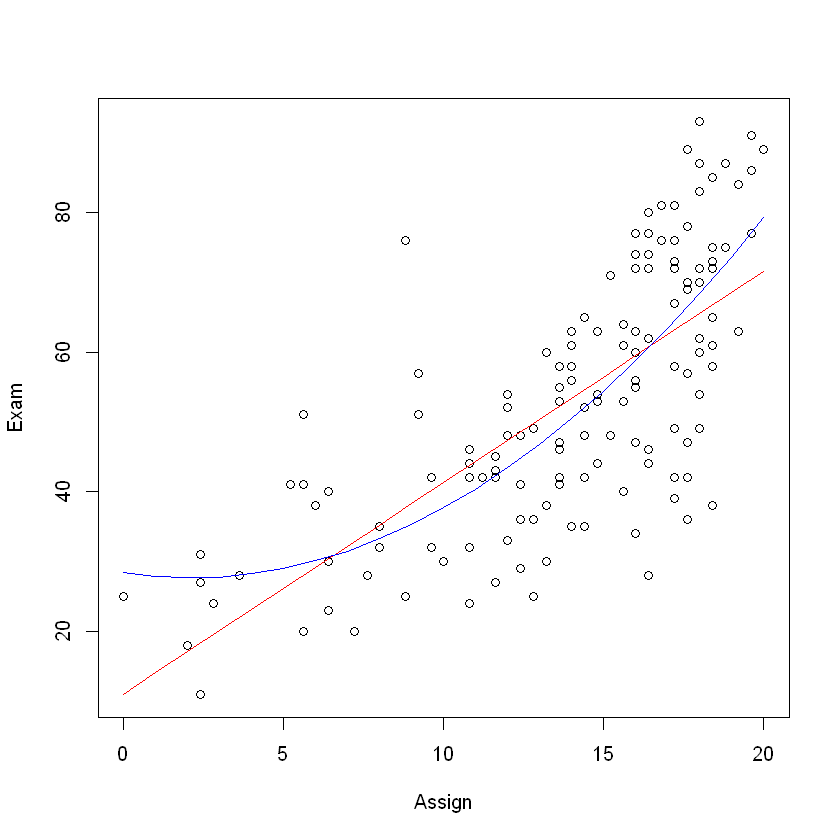

In [8]:
plot(Exam ~ Assign, data = Stats20x.df)
x <- 0:20 # Assignment values at which to predict exam mark
## Plot model 1
lines(x, predict(examassign.fit, data.frame(Assign = x)), col = "red")
## Plot model 2
lines(x, predict(examassign.fit2, data.frame(Assign = x)), col = "blue")


In [9]:
summary(examassign.fit2)



Call:
lm(formula = Exam ~ Assign + I(Assign^2), data = Stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.541  -9.149   1.273   9.087  41.116 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.41396    5.99081   4.743 5.05e-06 ***
Assign      -0.68172    1.07242  -0.636 0.525999    
I(Assign^2)  0.16102    0.04545   3.542 0.000536 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.65 on 143 degrees of freedom
Multiple R-squared:  0.5477,	Adjusted R-squared:  0.5414 
F-statistic: 86.59 on 2 and 143 DF,  p-value: < 2.2e-16


Note that the coefficient $β_2 > 0$ associated with the term $I(Assign)^2$ indicates an increase that starts slowly and ‘accelerates’(加速) as Assign increases.
